# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$. 

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  > 
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)
# pd.set_option('precision', 2)

# make the results repeatable
np.random.seed(1234)

In [2]:
def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[4, 8, 0, 2, 5, 7, 6, 3, 9, 1]

In [3]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [4]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

np.float64(4.243085290103738)

Tour length: 4.24


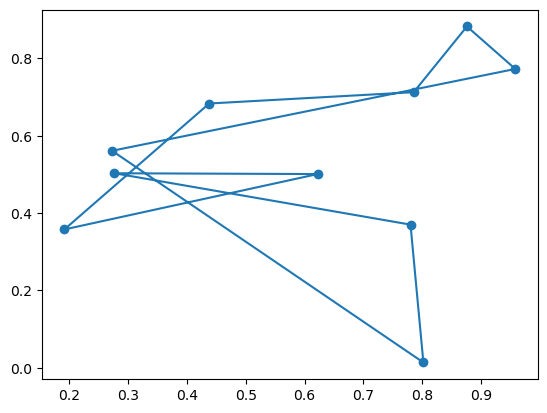

In [5]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)], ignore_index=True)
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%reload_ext rpy2.ipython

# dùng R lấy danh sách các gói đã cài và lưu vào biến Python
installed_packages = %R rownames(installed.packages())

# cài đặt 'TSP'
if 'TSP' not in installed_packages:
    print("Gói TSP chưa được cài. Đang tiến hành cài đặt...")
    %R install.packages('TSP', repos='https://cloud.r-project.org')
else:
    print("Gói TSP đã được cài đặt.")

# cài đặt 'microbenchmark'
if 'microbenchmark' not in installed_packages:
    print("Gói microbenchmark chưa được cài. Đang tiến hành cài đặt...")
    %R install.packages('microbenchmark', repos='https://cloud.r-project.org')
else:
    print("Gói microbenchmark đã được cài đặt.")

d = tsp["dist"]

Gói TSP chưa được cài. Đang tiến hành cài đặt...
package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp6ZsFx1\downloaded_packages


also installing the dependencies 'iterators', 'foreach'

trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/iterators_1.0.14.zip'
trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/foreach_1.5.2.zip'
trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/TSP_1.2-5.zip'


Gói microbenchmark chưa được cài. Đang tiến hành cài đặt...
package 'microbenchmark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp6ZsFx1\downloaded_packages


trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/microbenchmark_1.5.0.zip'
Content type 'application/zip' length 73544 bytes (71 KB)
downloaded 71 KB



Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [12]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class 'TSP' 
10 cities (distance 'unknown') 
object of class 'TOUR' 
result of method 'arbitrary_insertion+two_opt_rep_100' for 10 cities
tour length: 2.763574 


In addition: Warning message:
executing %dopar% sequentially: no parallel backend registered 


Tour length: 2.76


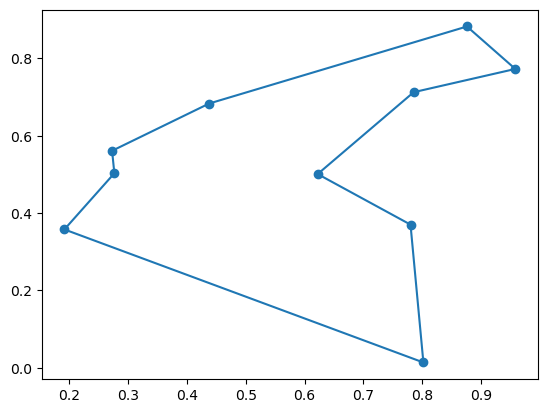

In [13]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [14]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr   min  lq     mean median     uq     max neval
 tsp <- TSP(d) 421.5 477 1184.062  746.5 822.55 14355.2   100


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Tour length: 2.81


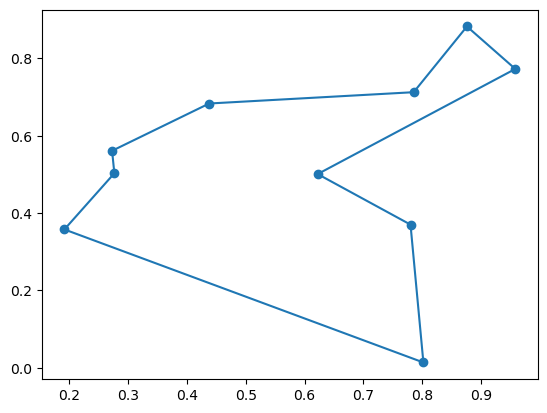

In [24]:
# Code goes here
def first_choice_hill_climbing(tsp, max_iter=1000):
    n = len(tsp["pos"])
    current_tour = random_tour(n)
    current_length = tour_length(tsp, current_tour)
    
    for _ in range(max_iter):
        # Sinh neighbor bằng cách hoán đổi 2 thành phố ngẫu nhiên
        i, j = random.sample(range(n), 2)
        neighbor = current_tour.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbor_length = tour_length(tsp, neighbor)
        
        # Nếu neighbor tốt hơn thì nhận
        if neighbor_length < current_length:
            current_tour = neighbor
            current_length = neighbor_length
    
    return current_tour, current_length

# chạy thử
best_tour, best_length = first_choice_hill_climbing(tsp, max_iter=5000)
show_tsp(tsp, best_tour)

## Bonus: Genetic Algorithm [+1 Point]

--- Bắt đầu quá trình tiến hóa ---
Thế hệ   1: Độ dài tốt nhất = 3.21  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   3: Độ dài tốt nhất = 3.09  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   7: Độ dài tốt nhất = 3.09  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ  10: Độ dài tốt nhất = 3.09
Thế hệ  20: Độ dài tốt nhất = 3.09
Thế hệ  24: Độ dài tốt nhất = 3.08  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ  30: Độ dài tốt nhất = 3.08
Thế hệ  39: Độ dài tốt nhất = 2.91  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ  40: Độ dài tốt nhất = 2.91
Thế hệ  50: Độ dài tốt nhất = 2.91
--- Quá trình tiến hóa kết thúc ---

Tour cuối cùng tốt nhất: [0, 5, 6, 2, 3, 8, 9, 1, 4, 7]
Độ dài tour cuối cùng: 2.91
Tour length: 2.91


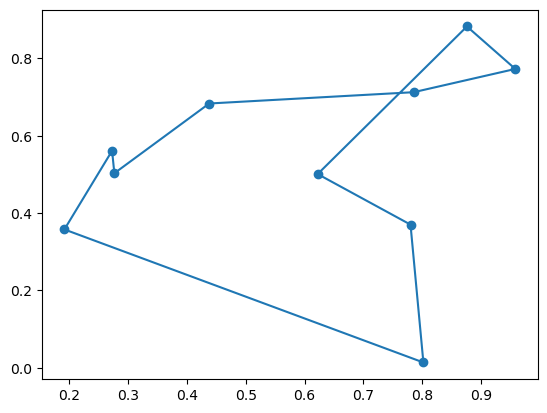

In [44]:
# Code goes here
def genetic_algorithm_tsp(tsp, pop_size=50, generations=200, mutation_rate=0.2):
    """
    Hàm giải bài toán người du lịch bằng thuật toán di truyền.
    """
    n = len(tsp["pos"]) # Lấy số lượng thành phố
    population = [random_tour(n) for _ in range(pop_size)] # Khởi tạo quần thể ban đầu
    
    # Hàm đánh giá độ thích nghi (tính độ dài của một tour)
    # Tour càng ngắn thì độ thích nghi càng cao (giá trị fitness càng nhỏ)
    def fitness(tour):
        return tour_length(tsp, tour)
    
    # Hàm chọn lọc (chọn ra 2 cá thể tốt nhất từ quần thể)
    def selection(pop):
        sorted_pop = sorted(pop, key=fitness)
        return sorted_pop[:2]
    
    # Hàm lai ghép (tạo ra cá thể con từ 2 cá thể cha mẹ)
    def crossover(parent1, parent2):
        a, b = sorted(random.sample(range(n), 2))
        child = [None]*n
        child[a:b] = parent1[a:b] # Lấy một đoạn gen từ cha mẹ 1
        # Lấy các gen còn lại từ cha mẹ 2 theo đúng thứ tự
        fill = [city for city in parent2 if city not in child[a:b]]
        idx = 0
        for i in range(n):
            if child[i] is None:
                child[i] = fill[idx]
                idx += 1
        return child
    
    # Hàm đột biến (thay đổi ngẫu nhiên một tour bằng cách hoán vị 2 thành phố)
    def mutate(tour):
        if random.random() < mutation_rate:
            i, j = random.sample(range(n), 2)
            tour[i], tour[j] = tour[j], tour[i]
        return tour
    
    # Lưu lại độ dài của tour ngắn nhất tìm được từ trước đến nay
    best_length_ever = float('inf')
    
    print("--- Bắt đầu quá trình tiến hóa ---")
    # Vòng lặp chính qua các thế hệ
    for gen in range(generations):
        # Tạo quần thể mới dựa trên chọn lọc, lai ghép và đột biến
        new_population = selection(population)
        while len(new_population) < pop_size:
            p1, p2 = random.sample(population, 2)
            child = crossover(p1, p2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
        
        # Lấy ra độ dài tour tốt nhất trong thế hệ hiện tại
        best_length_gen = fitness(min(population, key=fitness))
        
        # Kiểm tra xem có phải là giải pháp tốt nhất mới không
        is_new_best = best_length_gen < best_length_ever

        # Kiểm tra xem có phải là một thế hệ "cột mốc" không (ví dụ: mỗi 10 thế hệ)
        is_milestone = (gen + 1) % 10 == 0
        
        # Luôn cập nhật nếu tìm thấy giải pháp tốt hơn
        if is_new_best:
            best_length_ever = best_length_gen
        
        # In ra ở những thế hệ cột mốc hoặc khi có cải tiến
        if is_new_best or is_milestone:
            print(f"Thế hệ {gen+1: >3}: Độ dài tốt nhất = {best_length_gen:.2f}", end="")
            if is_new_best:
                print("  --> (Tìm thấy giải pháp tối ưu toàn cục mới)")
            else:
                print("")
                
    print("--- Quá trình tiến hóa kết thúc ---")
    
    # Tìm tour tốt nhất trong quần thể cuối cùng
    best_tour = min(population, key=fitness)
    best_length = fitness(best_tour)
    
    print(f"\nTour cuối cùng tốt nhất: {best_tour}")
    print(f"Độ dài tour cuối cùng: {best_length:.2f}")
    return best_tour, best_length

# Chạy thử
best_tour, best_length = genetic_algorithm_tsp(tsp, pop_size=50, generations=50, mutation_rate=0.2)
show_tsp(tsp, best_tour)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [52]:
# Code and results go here
import time

sizes = [10, 20, 30]  # Số lượng thành phố thử nghiệm
results = []

for n in sizes:
    print(f"\n--- TSP size: {n} ---")
    tsp = random_tsp(n)
    
    # First-choice Hill Climbing
    t0 = time.time()
    tour_hc, length_hc = first_choice_hill_climbing(tsp, max_iter=5000)
    t1 = time.time()
    time_hc = t1 - t0
    print(f"Hill Climbing: length={length_hc:.2f}, time={time_hc*1000:.1f} ms")
    
    # Genetic Algorithm
    t0 = time.time()
    tour_ga, length_ga = genetic_algorithm_tsp(tsp, pop_size=50, generations=50, mutation_rate=0.2)
    t1 = time.time()
    time_ga = t1 - t0
    print(f"Genetic Algorithm: length={length_ga:.2f}, time={time_ga*1000:.1f} ms")
    
    results.append({
        "size": n,
        "hill_climbing_length": length_hc,
        "hill_climbing_time_ms": time_hc*1000,
        "genetic_length": length_ga,
        "genetic_time_ms": time_ga*1000
    })

# Hiển thị kết quả tổng hợp
import pandas as pd
df = pd.DataFrame(results)
print("\nSummary:")
print(df)


--- TSP size: 10 ---
Hill Climbing: length=3.70, time=80.0 ms
--- Bắt đầu quá trình tiến hóa ---
Thế hệ   1: Độ dài tốt nhất = 4.70  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   3: Độ dài tốt nhất = 4.49  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   6: Độ dài tốt nhất = 4.40  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   7: Độ dài tốt nhất = 4.10  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ  10: Độ dài tốt nhất = 4.08  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ  20: Độ dài tốt nhất = 4.08
Thế hệ  30: Độ dài tốt nhất = 4.08
Thế hệ  40: Độ dài tốt nhất = 4.08
Thế hệ  50: Độ dài tốt nhất = 4.08
--- Quá trình tiến hóa kết thúc ---

Tour cuối cùng tốt nhất: [1, 7, 3, 0, 8, 9, 5, 4, 2, 6]
Độ dài tour cuối cùng: 4.08
Genetic Algorithm: length=4.08, time=87.9 ms

--- TSP size: 20 ---
Hill Climbing: length=4.91, time=88.9 ms
--- Bắt đầu quá trình tiến hóa ---
Thế hệ   1: Độ dài tốt nhất = 6.93  --> (Tìm thấy giải pháp tối ưu toàn cục mới)
Thế hệ   9: 